In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('train.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
one_hot_categorical_columns=[]
for column in df.columns[:-1]:
    if df[column].nunique() <=2:
        one_hot_categorical_columns.append(column)
        print(f'The {column} has {df[column].nunique()} elements')
        print(f'The unique values in the {column} are {df[column].unique()}\n')
len(one_hot_categorical_columns)

The blue has 2 elements
The unique values in the blue are [0 1]

The dual_sim has 2 elements
The unique values in the dual_sim are [0 1]

The four_g has 2 elements
The unique values in the four_g are [0 1]

The three_g has 2 elements
The unique values in the three_g are [0 1]

The touch_screen has 2 elements
The unique values in the touch_screen are [0 1]

The wifi has 2 elements
The unique values in the wifi are [1 0]



6

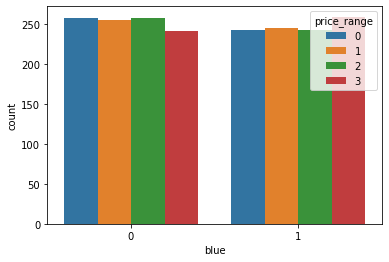

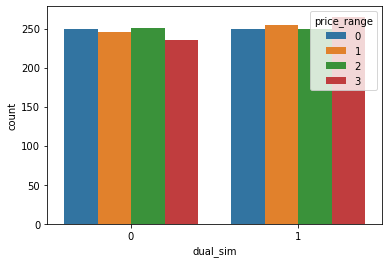

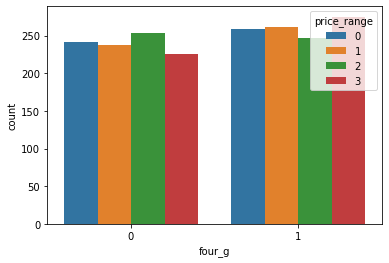

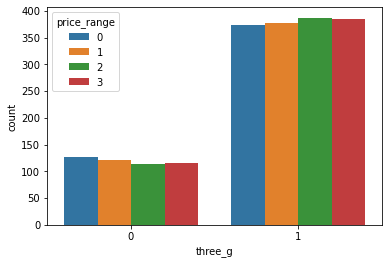

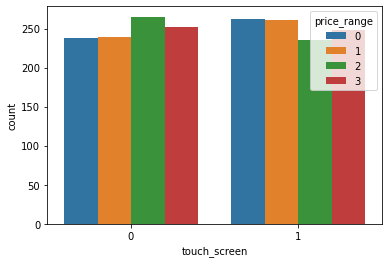

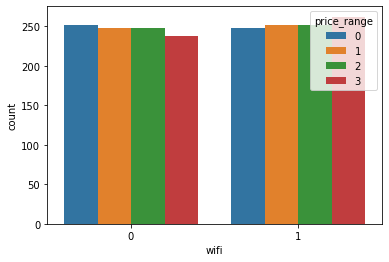

In [5]:
for column in one_hot_categorical_columns:
    sns.countplot(df[column],hue=df['price_range'])
    plt.show()

In [6]:
categorical_columns=[]
for column in df.columns[:-1]:
    if df[column].nunique()>2 and df[column].nunique()<=0.5*(len(df)) and df[column].dtype=='int64':
        categorical_columns.append(column)
        print(f'The {column} has {df[column].nunique()} elements')
len(categorical_columns)

The fc has 20 elements
The int_memory has 63 elements
The mobile_wt has 121 elements
The n_cores has 8 elements
The pc has 21 elements
The sc_h has 15 elements
The sc_w has 19 elements
The talk_time has 19 elements


8

In [7]:
# large_categorical_columns=[]
# for column in df.columns[:-1]:
#     if df[column].nunique()>=0.5*(len(df)) and df[column].dtype=='int64':
#         large_categorical_columns.append(column)
#         print(f'The {column} has {df[column].nunique()} elements')
# len(large_categorical_columns)

In [8]:
continuous_columns=[]
for column in df.columns[:-1]:
    if df[column].dtype=='float64' or (df[column].nunique()>=0.5*(len(df)) and df[column].dtype=='int64'):
        print(f'The {column} is a continuous variable')
        # print(f'The {column} has {df[column].unique()}\n')
        continuous_columns.append(column)
len(continuous_columns)

The battery_power is a continuous variable
The clock_speed is a continuous variable
The m_dep is a continuous variable
The px_height is a continuous variable
The px_width is a continuous variable
The ram is a continuous variable


6

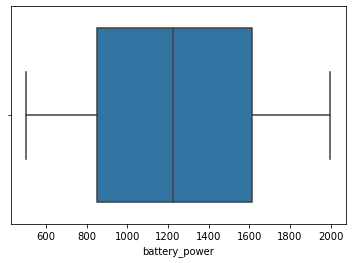

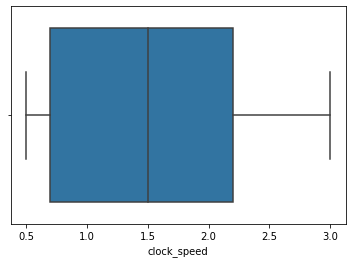

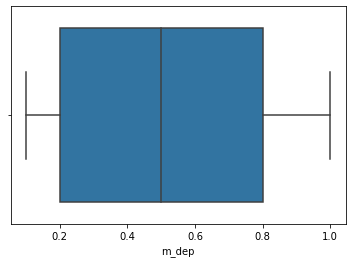

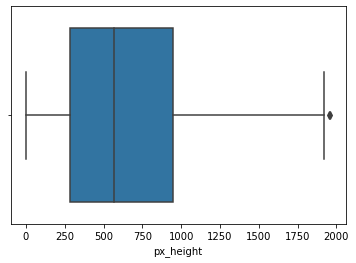

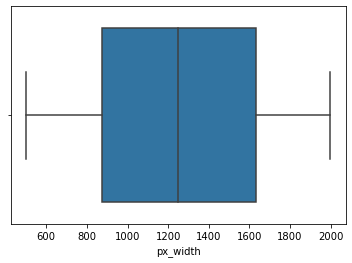

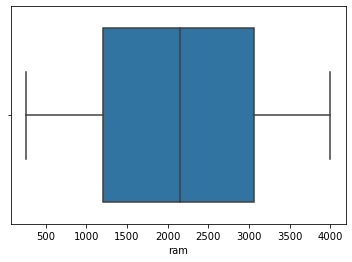

In [9]:
for column in continuous_columns:
    # plt.figure(figsize=(20,12))
    sns.boxplot((df[column]))
    plt.show()

In [10]:
df['fc'].unique()

array([ 1,  0,  2, 13,  3,  4,  5,  7, 11, 12, 16,  6, 15,  8,  9, 10, 18,
       17, 14, 19], dtype=int64)

In [11]:
df[['fc','price_range']].value_counts().reset_index().rename(columns={0:'count'})

,fc,price_range,count
0,0,1,124
1,0,0,121
2,0,2,121
3,0,3,108
4,1,3,70
...,...,...,...
70,14,2,2
71,17,1,2
72,18,3,2
73,15,0,1


In [12]:
for column in categorical_columns:
    encoded=df[[column,'price_range']].value_counts().reset_index().rename(columns={0:'count'})
    for row in range(len(df)):
        for value in range(len(encoded)):
            if (df[column][row]==encoded[column][value] and df['price_range'][row]==encoded['price_range'][value]):
                df[column][row]=encoded['count'][value]

In [13]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,64,0,7,0.6,3,59,...,20,756,2549,29,30,31,0,0,1,1
1,1021,1,0.5,1,121,1,10,0.7,4,56,...,905,1988,2631,41,47,31,1,1,0,2
2,563,1,0.5,1,52,1,10,0.9,11,66,...,1263,1716,2603,27,41,24,1,1,0,2
3,615,1,2.5,0,121,0,6,0.8,6,57,...,1216,1786,2769,27,27,24,1,0,0,2
4,1821,1,1.2,0,5,1,7,0.6,3,59,...,1208,1212,1411,34,41,32,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,121,1,11,0.8,2,61,...,1222,1890,668,25,46,27,1,1,0,0
1996,1965,1,2.6,1,121,0,7,0.2,8,73,...,915,1965,2032,27,7,32,1,1,1,2
1997,1911,0,0.9,1,70,1,7,0.7,5,59,...,868,1632,3057,30,65,25,1,1,0,3
1998,1512,0,0.9,0,35,1,5,0.1,5,59,...,336,670,869,25,35,27,1,1,1,0


In [14]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
minmax=MinMaxScaler()
standard=StandardScaler()
robust=RobustScaler()

In [15]:
def plot(df,column):
    fig,axes=plt.subplots(2,4,figsize=(20,12))
    plt.suptitle(f'Plot for {column}')
    sns.axisgrid
    sns.distplot(ax=axes[0,0],a=df[column],axlabel='Normal')
    sns.distplot(ax=axes[0,1],a=1/(df[column]+0.00001),axlabel='Reciprocal')
    sns.distplot(ax=axes[0,2],a=np.sqrt(df[column]),axlabel='Square root')
    sns.distplot(ax=axes[0,3],a=(df[column]**(1/3)),axlabel='Cube root')
    sns.distplot(ax=axes[1,0],a=(df[column]**(1/4)),axlabel='fourth root')
    sns.distplot(ax=axes[1,1],a=(df[column]**(1/5)),axlabel='fifth root')
    sns.distplot(ax=axes[1,2],a=np.log1p(df[column]),axlabel='Logarithmic')
    # sns.distplot(ax=axes[1,1],a=standard.fit_transform([df[column]]),axlabel='Standard')
    # sns.distplot(ax=axes[1,2],a=robust.fit_transform([df[column]]),axlabel='Robust')
    # sns.distplot(ax=axes[1,3],a=minmax.fit_transform([df[column]]),axlabel='Minmax')

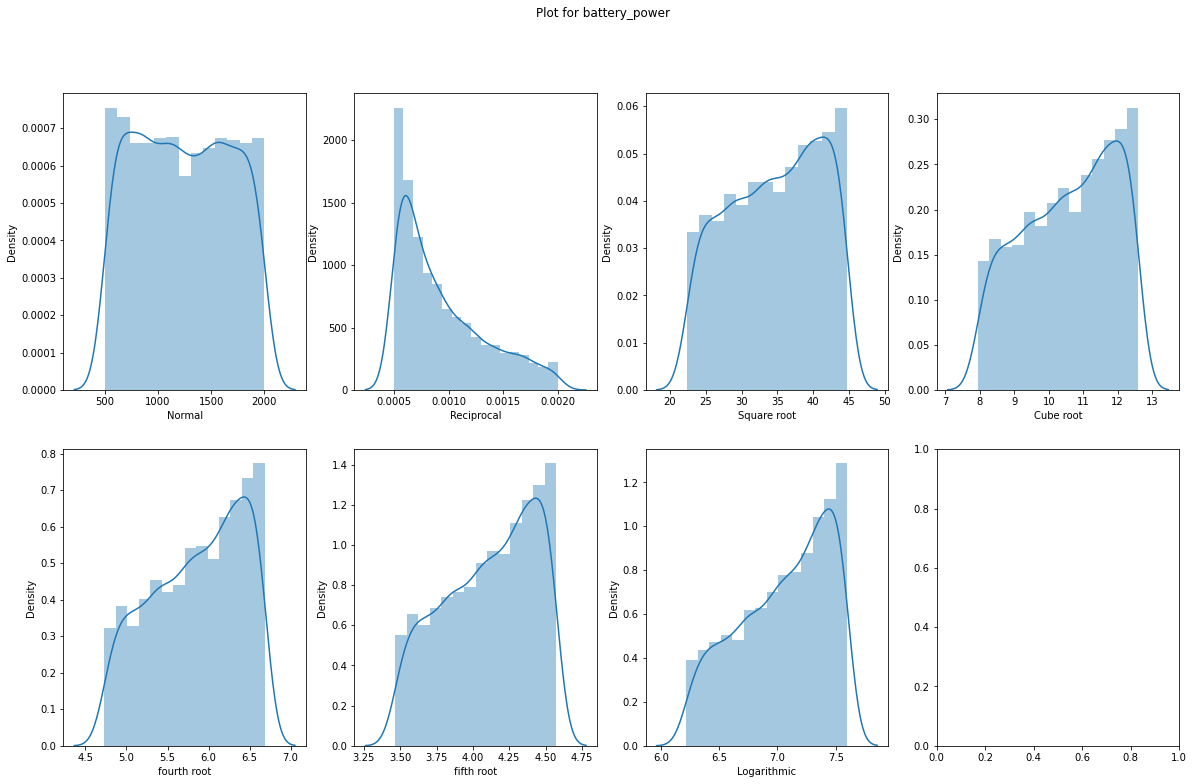

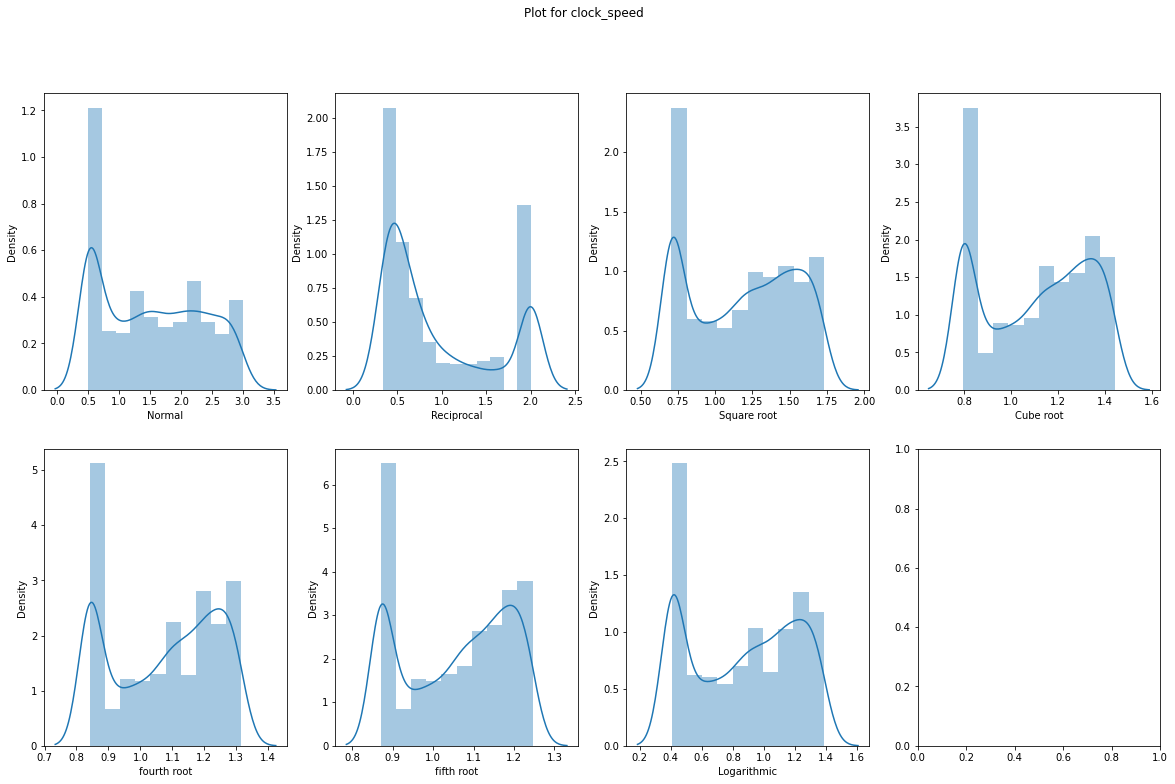

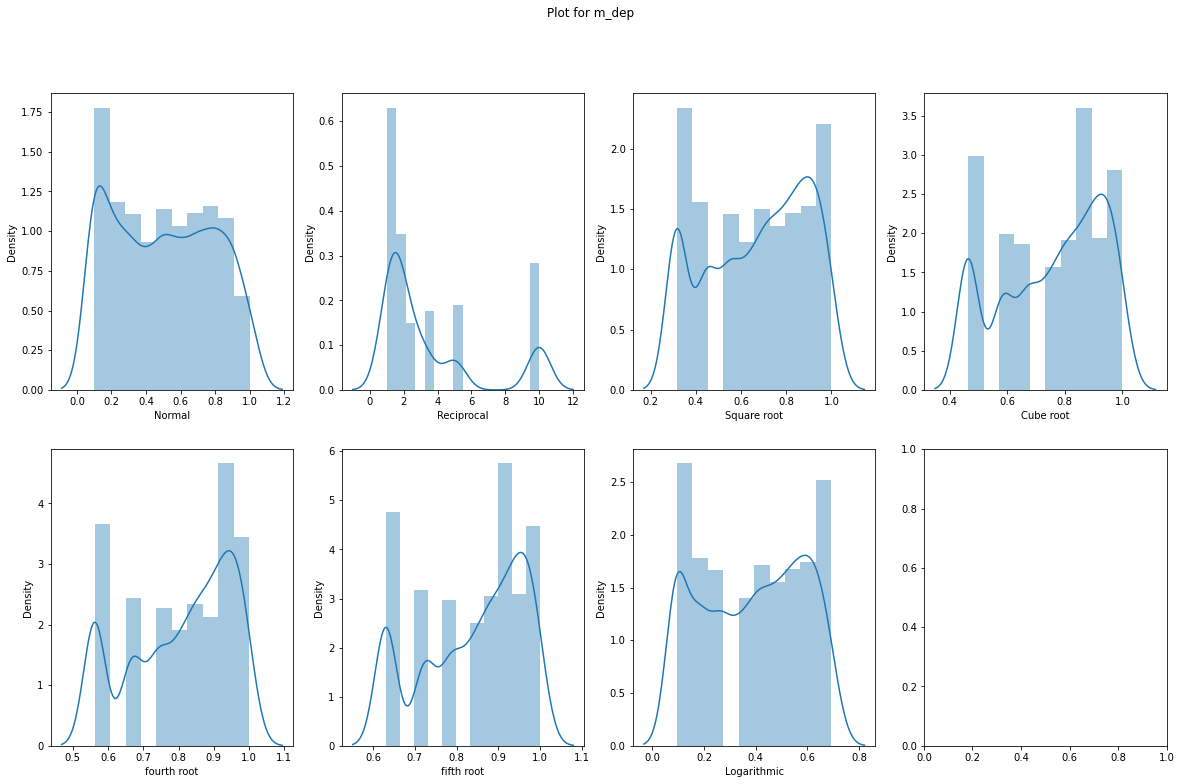

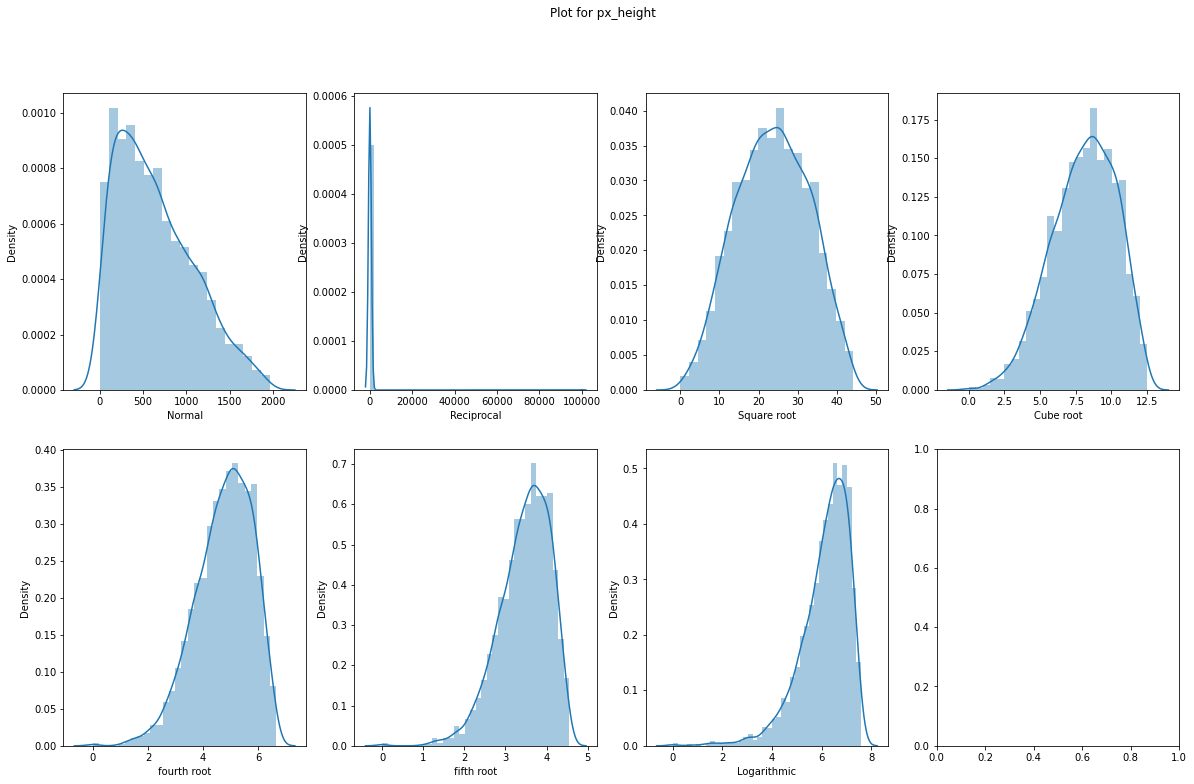

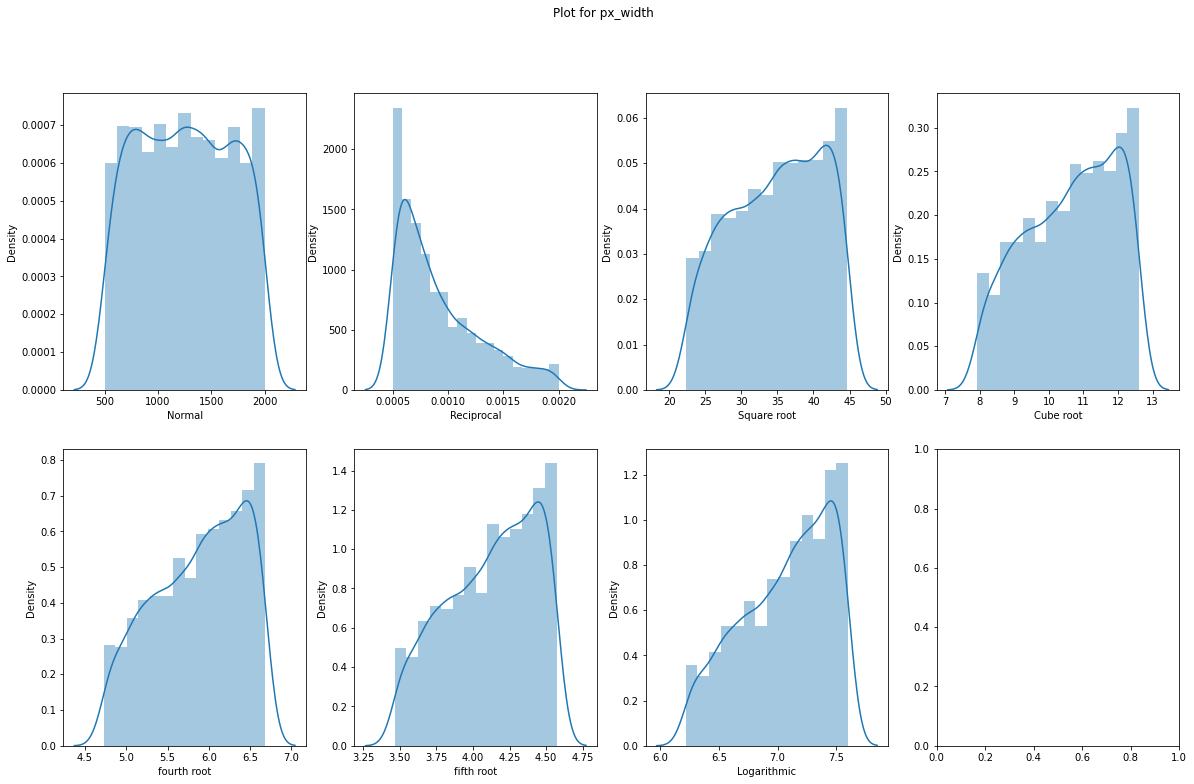

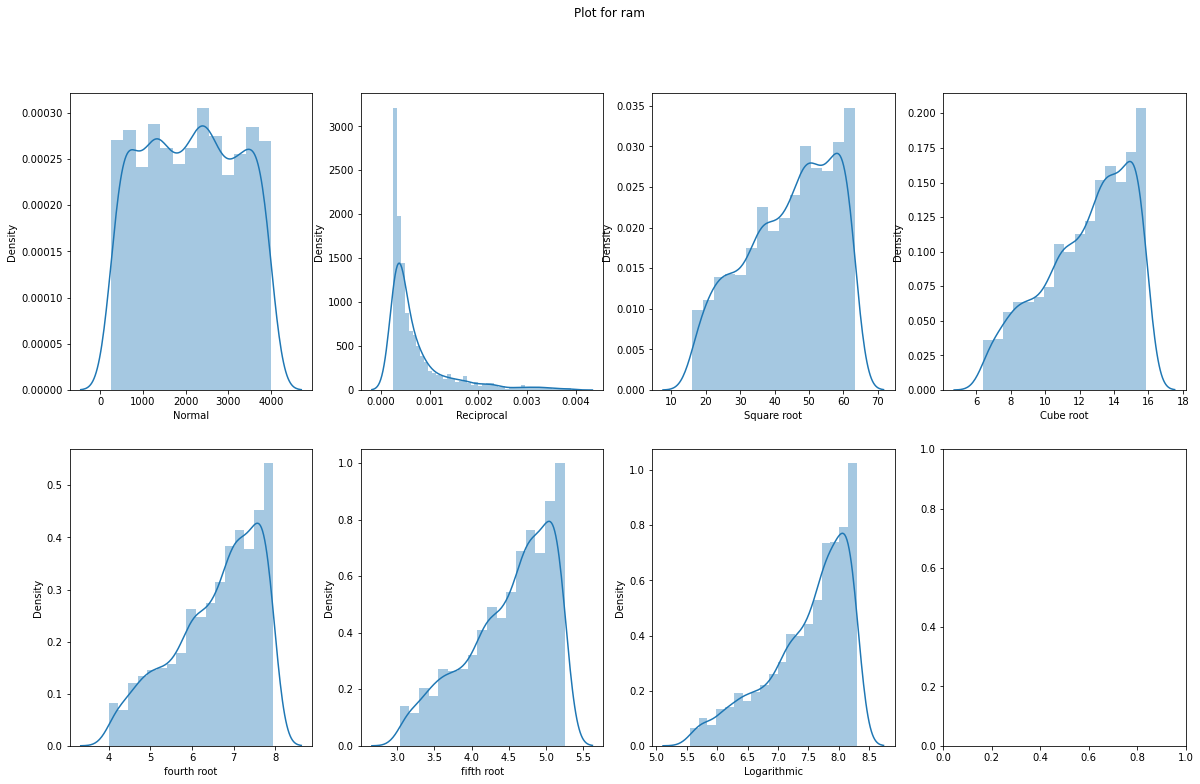

In [16]:
for column in continuous_columns:
    plot(df,column)

In [17]:
df['clock_speed']=np.log1p(df['clock_speed'])
df['m_dep']=np.log1p(df['m_dep'])
df['px_height']=np.sqrt(df['px_height'])

In [18]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,1.163151,0,64,0,7,0.470004,3,59,...,4.472136,756,2549,29,30,31,0,0,1,1
1,1021,1,0.405465,1,121,1,10,0.530628,4,56,...,30.083218,1988,2631,41,47,31,1,1,0,2
2,563,1,0.405465,1,52,1,10,0.641854,11,66,...,35.538711,1716,2603,27,41,24,1,1,0,2
3,615,1,1.252763,0,121,0,6,0.587787,6,57,...,34.871192,1786,2769,27,27,24,1,0,0,2
4,1821,1,0.788457,0,5,1,7,0.470004,3,59,...,34.756294,1212,1411,34,41,32,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.405465,1,121,1,11,0.587787,2,61,...,34.957117,1890,668,25,46,27,1,1,0,0
1996,1965,1,1.280934,1,121,0,7,0.182322,8,73,...,30.248967,1965,2032,27,7,32,1,1,1,2
1997,1911,0,0.641854,1,70,1,7,0.530628,5,59,...,29.461840,1632,3057,30,65,25,1,1,0,3
1998,1512,0,0.641854,0,35,1,5,0.095310,5,59,...,18.330303,670,869,25,35,27,1,1,1,0


<AxesSubplot:>

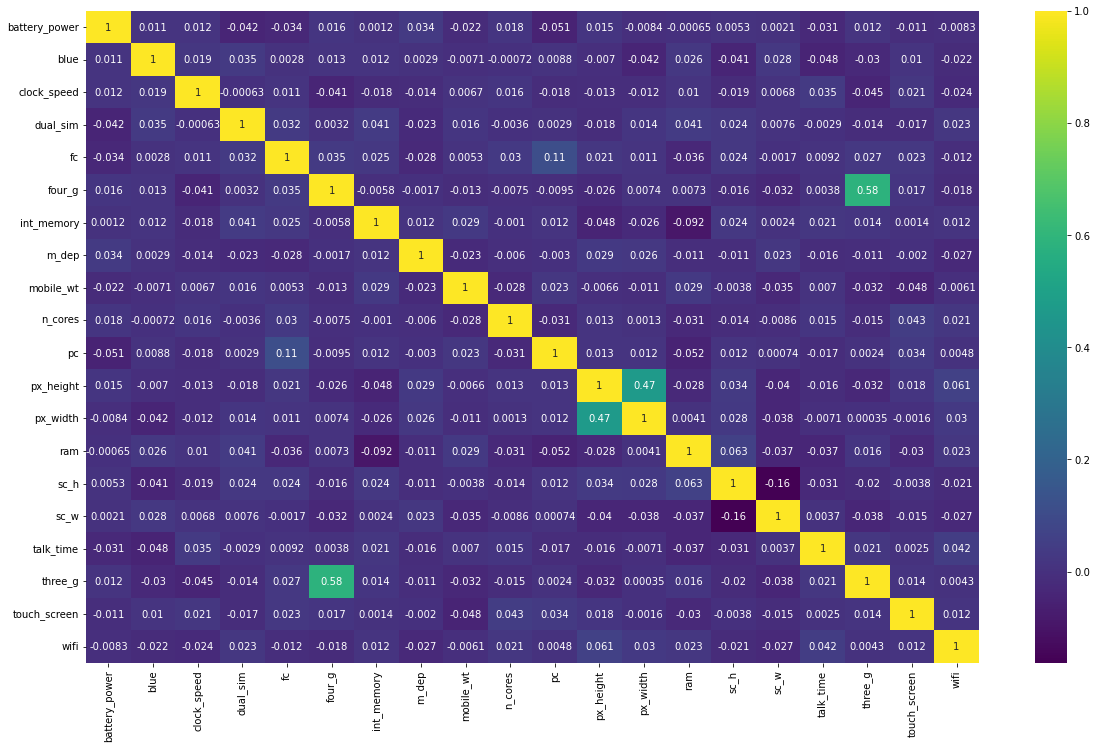

In [19]:
plt.figure(figsize=(20,12))
sns.heatmap(df.iloc[:,:-1].corr(),cmap='viridis',annot=True)

### As we see there isnt much correlation between features

### Lets build the model

In [20]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,RandomForestClassifier
from sklearn.metrics import accuracy_score,auc,confusion_matrix,f1_score,classification_report

In [21]:
X=df.drop('price_range',axis=1)
y=df['price_range']

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca=PCA()
pca.fit(X)

PCA()

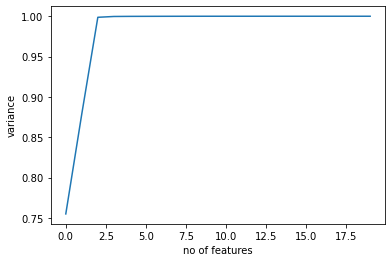

In [24]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('no of features')
plt.ylabel('variance')
plt.show()

In [25]:
from sklearn.feature_selection import f_regression,SelectKBest,f_classif
best=SelectKBest(f_classif,k=18)
X_new=pd.DataFrame(best.fit_transform(X,y),columns=X.columns[best.get_support()])
X_new

,battery_power,blue,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen
0,842.0,0.0,0.0,64.0,0.0,7.0,0.470004,3.0,59.0,23.0,4.472136,756.0,2549.0,29.0,30.0,31.0,0.0,0.0
1,1021.0,1.0,1.0,121.0,1.0,10.0,0.530628,4.0,56.0,25.0,30.083218,1988.0,2631.0,41.0,47.0,31.0,1.0,1.0
2,563.0,1.0,1.0,52.0,1.0,10.0,0.641854,11.0,66.0,25.0,35.538711,1716.0,2603.0,27.0,41.0,24.0,1.0,1.0
3,615.0,1.0,0.0,121.0,0.0,6.0,0.587787,6.0,57.0,27.0,34.871192,1786.0,2769.0,27.0,27.0,24.0,1.0,0.0
4,1821.0,1.0,0.0,5.0,1.0,7.0,0.470004,3.0,59.0,27.0,34.756294,1212.0,1411.0,34.0,41.0,32.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794.0,1.0,1.0,121.0,1.0,11.0,0.587787,2.0,61.0,28.0,34.957117,1890.0,668.0,25.0,46.0,27.0,1.0,1.0
1996,1965.0,1.0,1.0,121.0,0.0,7.0,0.182322,8.0,73.0,25.0,30.248967,1965.0,2032.0,27.0,7.0,32.0,1.0,1.0
1997,1911.0,0.0,1.0,70.0,1.0,7.0,0.530628,5.0,59.0,21.0,29.461840,1632.0,3057.0,30.0,65.0,25.0,1.0,1.0
1998,1512.0,0.0,0.0,35.0,1.0,5.0,0.095310,5.0,59.0,13.0,18.330303,670.0,869.0,25.0,35.0,27.0,1.0,1.0


In [34]:
X_new_scaled=pd.DataFrame(standard.fit_transform(X_new),columns=standard.get_feature_names_out())
X_new_scaled

,battery_power,blue,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen
0,-0.902597,-0.990050,-1.019184,0.247191,-1.043966,0.095404,0.421246,-1.041677,-0.610598,-0.380263,-2.074697,-1.146784,0.391703,-0.730327,-0.446830,0.916228,-1.786861,-1.006018
1,-0.495139,1.010051,0.981177,1.684787,0.957886,1.698825,0.731975,-0.567972,-1.037490,-0.010537,0.695085,1.704465,0.467317,0.726926,0.719111,0.916228,0.559641,0.994018
2,-1.537686,1.010051,0.981177,-0.055461,0.957886,1.698825,1.302056,2.747963,0.385483,-0.010537,1.285084,1.074968,0.441498,-0.973202,0.307603,-0.681181,0.559641,0.994018
3,-1.419319,1.010051,-1.019184,1.684787,-1.043966,-0.439070,1.024937,0.379438,-0.895192,0.359189,1.212894,1.236971,0.594569,-0.973202,-0.652584,-0.681181,0.559641,-1.006018
4,1.325906,1.010051,-1.019184,-1.240847,0.957886,0.095404,0.421246,-1.041677,-0.610598,0.359189,1.200468,-0.091452,-0.657666,-0.123138,0.307603,1.144429,0.559641,0.994018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.011860,1.010051,0.981177,1.684787,0.957886,2.233299,1.024937,-1.515382,-0.326003,0.544052,1.222186,1.477661,-1.342799,-1.216078,0.650527,0.003423,0.559641,0.994018
1996,1.653694,1.010051,0.981177,1.684787,-1.043966,0.095404,-1.053254,1.326848,1.381565,-0.010537,0.713010,1.651235,-0.085031,-0.973202,-2.024280,1.144429,0.559641,0.994018
1997,1.530773,-0.990050,0.981177,0.398517,0.957886,0.095404,0.731975,-0.094267,-0.610598,-0.749989,0.627884,0.880565,0.860139,-0.608889,1.953638,-0.452979,0.559641,0.994018
1998,0.622527,-0.990050,-1.019184,-0.484218,0.957886,-0.973544,-1.499227,-0.094267,-0.610598,-2.228892,-0.575967,-1.345816,-1.157454,-1.216078,-0.103906,0.003423,0.559641,0.994018


In [35]:
X_train,X_test,y_train,y_test=train_test_split(X_new_scaled,y,stratify=y,random_state=42,test_size=0.25)

In [36]:
logistic=LogisticRegression()
logistic_model=logistic.fit(X_train,y_train)
print('Classification Report\n',classification_report(y_test,logistic_model.predict(X_test)))
print('Confusion Matrix\n',confusion_matrix(y_test,logistic_model.predict(X_test)))
print('The train accuracy is',accuracy_score(y_train,logistic_model.predict(X_train)))
print('The test accuracy is',accuracy_score(y_test,logistic_model.predict(X_test)))

Classification Report
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       125
           1       0.96      0.94      0.95       125
           2       0.92      0.94      0.93       125
           3       0.97      0.97      0.97       125

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500

Confusion Matrix
 [[124   1   0   0]
 [  2 117   6   0]
 [  0   4 117   4]
 [  0   0   4 121]]
The train accuracy is 0.9513333333333334
The test accuracy is 0.958


In [37]:
decision=DecisionTreeClassifier(random_state=42)
decision_model=decision.fit(X_train,y_train)
print('Classification Report\n',classification_report(y_test,decision_model.predict(X_test)))
print('Confusion Matrix\n',confusion_matrix(y_test,decision_model.predict(X_test)))
print('The train accuracy is',accuracy_score(y_train,decision_model.predict(X_train)))
print('The test accuracy is',accuracy_score(y_test,decision_model.predict(X_test)))

Classification Report
               precision    recall  f1-score   support

           0       0.93      0.94      0.94       125
           1       0.85      0.85      0.85       125
           2       0.88      0.87      0.88       125
           3       0.94      0.94      0.94       125

    accuracy                           0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.90      0.90      0.90       500

Confusion Matrix
 [[118   7   0   0]
 [  9 106   8   2]
 [  0  10 109   6]
 [  0   1   7 117]]
The train accuracy is 1.0
The test accuracy is 0.9


In [38]:
decision=DecisionTreeClassifier()
decision_model=decision.fit(X_train,y_train)
print('Classification Report\n',classification_report(y_test,decision_model.predict(X_test)))
print('Confusion Matrix\n',confusion_matrix(y_test,decision_model.predict(X_test)))
print('The train accuracy is',accuracy_score(y_train,decision.predict(X_train)))
print('The test accuracy is',accuracy_score(y_test,decision.predict(X_test)))

Classification Report
               precision    recall  f1-score   support

           0       0.92      0.95      0.94       125
           1       0.83      0.85      0.84       125
           2       0.88      0.85      0.87       125
           3       0.94      0.94      0.94       125

    accuracy                           0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.90      0.90      0.90       500

Confusion Matrix
 [[119   6   0   0]
 [ 10 106   7   2]
 [  0  14 106   5]
 [  0   1   7 117]]
The train accuracy is 1.0
The test accuracy is 0.896


In [40]:
test_df=pd.read_csv('test.csv')
test_df.drop('id',axis=1,inplace=True)
test_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


In [42]:
def test_set():
    test_df=pd.read_csv('test.csv')
    # test_df.drop('id',axis=1,inplace=True)
    for column in categorical_columns:
        encoded=df[[column,'price_range']].value_counts().reset_index().rename(columns={0:'count'})
        for row in range(len(test_df)):
            for value in range(len(encoded)):
                if (test_df[column][row]==encoded[column][value] and test_df['price_range'][row]==encoded['price_range'][value]):
                    test_df[column][row]=encoded['count'][value]

In [43]:
test_set()

KeyError: 'price_range'